## L1与L2的区别

In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = load_breast_cancer()
X = data.data
y = data.target
data.data.shape
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [3]:
lrl1 = lrl1.fit(X, y)
lrl2 = lrl2.fit(X, y)

In [4]:
# 查看各个特征的系数\theta
lrl1.coef_

array([[ 4.01962915,  0.0322467 , -0.1398271 , -0.01623377,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50570345,  0.        , -0.07126632,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24621131, -0.1288122 , -0.0143969 ,  0.        ,
         0.        , -2.02143139,  0.        ,  0.        ,  0.        ]])

In [5]:
lrl2.coef_

array([[ 1.61543234e+00,  1.02284415e-01,  4.78483684e-02,
        -4.43927107e-03, -9.42247882e-02, -3.01420673e-01,
        -4.56065677e-01, -2.22346063e-01, -1.35660484e-01,
        -1.93917198e-02,  1.61646580e-02,  8.84531037e-01,
         1.20301273e-01, -9.47422278e-02, -9.81687769e-03,
        -2.37399092e-02, -5.71846204e-02, -2.70190106e-02,
        -2.77563737e-02,  1.98122260e-04,  1.26394730e+00,
        -3.01762592e-01, -1.72784162e-01, -2.21786411e-02,
        -1.73339657e-01, -8.79070550e-01, -1.16325561e+00,
        -4.27661014e-01, -4.20612369e-01, -8.69820058e-02]])

In [6]:
"""
可以看出，L1正则化可以把参数的系数变为0，而L2正则化只会减小其系数，不会等于0。
默认使用L2正则化，如果L2正则化的结果不行，再用L1正则化试一试。
"""

'\n可以看出，L1正则化可以把参数的系数变为0，而L2正则化只会减小其系数，不会等于0。\n默认使用L2正则化，如果L2正则化的结果不行，再用L1正则化试一试。\n'

### 绘制学习曲线

In [24]:
scores_l1_train = []
scores_l2_train = []
scores_l1_test = []
scores_l2_test = []

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420)

for i in np.linspace(0.01, 1, 21):
    lrl1 = LR(penalty='l1', C=i, solver='liblinear', max_iter=1000).fit(X, y)
    lrl2 = LR(penalty='l2', C=i, solver='liblinear', max_iter=1000).fit(X, y)    
    score_l1_train = accuracy_score(lrl1.predict(X_train), y_train)
    score_l2_train = accuracy_score(lrl2.predict(X_train), y_train)    
    score_l1_test = accuracy_score(lrl1.predict(X_test), y_test)    
    score_l2_test = accuracy_score(lrl2.predict(X_test), y_test)    
    
    scores_l1_train.append(score_l1_train)
    scores_l2_train.append(score_l2_train)    
    scores_l1_test.append(score_l1_test)    
    scores_l2_test.append(score_l2_test)    

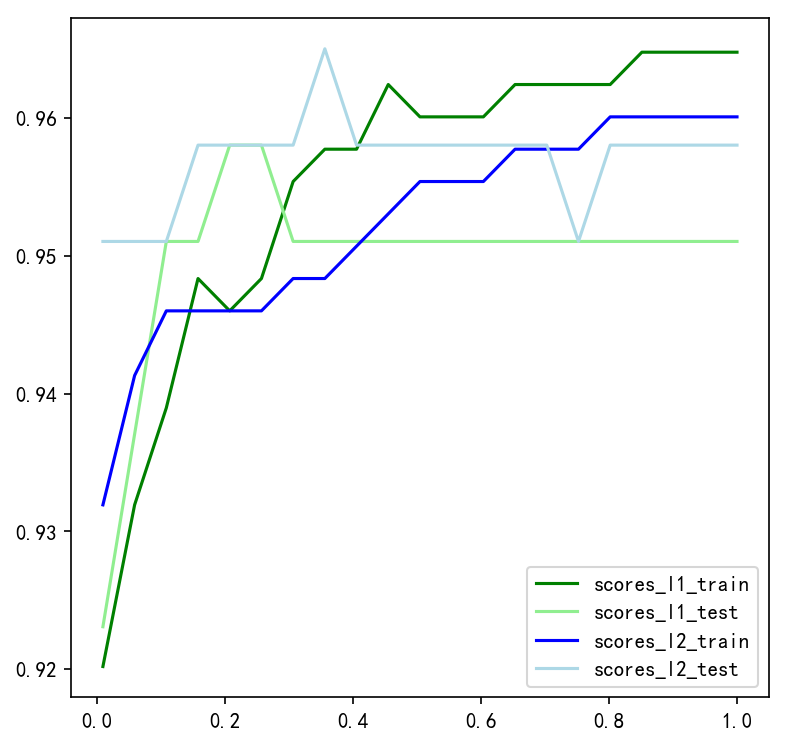

In [25]:
graph = [scores_l1_train, scores_l1_test, scores_l2_train, scores_l2_test]
label = ['scores_l1_train', 'scores_l1_test', 'scores_l2_train', 'scores_l2_test']
colors = ['green', 'lightgreen', 'blue', 'lightblue']

fig = plt.figure(figsize=(6,6))
for i in range(4):
    plt.plot(np.linspace(0.01, 1, 21), graph[i], c=colors[i], label=label[i])
plt.legend(loc='best')
plt.show()

In [26]:
"""可以看到，在训练集上越好，不代表在测试集上的分数越高，。在逻辑回归中，
会先上升，而后到达测试集最好的分数，然后就开始平稳或者波动。  """

'可以看到，在训练集上越好，不代表在测试集上的分数越高，。在逻辑回归中，\n会先上升，而后到达测试集最好的分数，然后就开始平稳或者波动。  '

## 用嵌入法过滤特征

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [29]:
X.shape

(569, 30)

In [31]:
y.shape

(569,)

In [32]:
# 这里使用L1正则化过滤
lr = LR(solver='liblinear', C=0.8, max_iter=1000)
cross_val_score(lr, X, y, cv=10).mean()

0.9508998790078644

In [33]:
X_embedded = SelectFromModel(lr, norm_order=1).fit_transform(X, y) # 使用L1正则化

In [35]:
X_embedded.shape  # 可以看到嵌入法为我们选择了9个特征

(569, 9)

In [36]:
cross_val_score(lr, X_embedded, y, cv=10).mean()  
"""虽然模型分数降低了，但是对于30维的数据,降到9维，可以简化我们现实的预测"""

0.9368323826808401

### 调整threshold, 试一试模型效果与维度能否达到一个更好的结果

In [46]:
np.max(lr.fit(X, y).coef_)

1.9407192479360273

In [52]:
scores_th = []
lr = LR(solver='liblinear', C=0.8, max_iter=1000)
ths = np.linspace(0, np.max(abs(lr.fit(X, y).coef_)), 20)
i = 0
shapes = []
for th in ths:
    X_embedded = SelectFromModel(lr, threshold=th).fit_transform(X, y)
    score = cross_val_score(lr, X_embedded, y, cv=10).mean()
    scores_th.append(score)
    print(ths[i], X_embedded.shape[1])
    shapes.append(X_embedded.shape[1])
    i+=1

0.0 30
0.1021431183124225 17
0.204286236624845 12
0.3064293549372675 10
0.40857247324969 8
0.5107155915621124 8
0.612858709874535 5
0.7150018281869575 5
0.81714494649938 5
0.9192880648118025 5
1.0214311831242249 5
1.1235743014366475 4
1.22571741974907 3
1.3278605380614925 2
1.430003656373915 2
1.5321467746863375 1
1.63428989299876 1
1.7364330113111823 1
1.838576129623605 1
1.9407192479360273 1


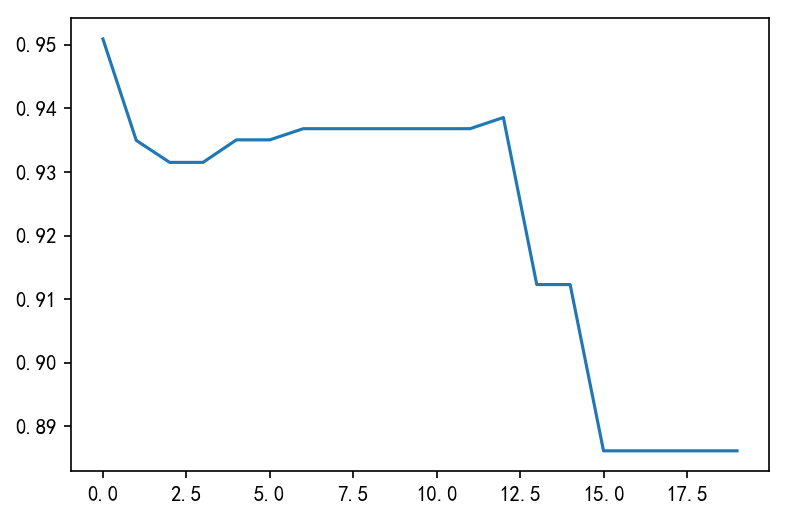

In [54]:
plt.plot(scores_th)

### 试一试C的学习曲线

In [64]:
scores_lr = []
scores_embedded = []
embedded_shape = []
for i in np.arange(2.05, 12.05, 0.5):
    lr = LR(solver='liblinear', C=i, max_iter=1000)
    scores_lr.append(cross_val_score(lr, X, y, cv=10).mean())
    X_embedded = SelectFromModel(lr,norm_order=1).fit_transform(X, y)
    embedded_shape.append(X_embedded.shape[1])
    scores_embedded.append(cross_val_score(lr, X_embedded, y, cv=10).mean())

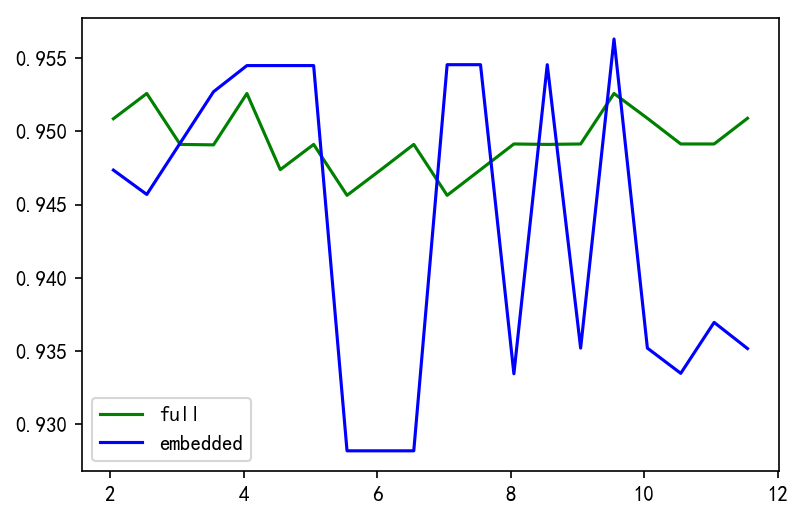

In [65]:
plt.plot(np.arange(2.05, 12.05, 0.5), scores_lr, c='g', label='full')
plt.plot(np.arange(2.05, 12.05, 0.5), scores_embedded, c='b', label='embedded')
plt.xticks()
plt.legend()
plt.show()

In [66]:
[*zip(np.arange(2.05, 12.05, 0.5), embedded_shape, scores_embedded)]

[(2.05, 9, 0.9473597787572379),
 (2.55, 9, 0.9456972171808833),
 (3.05, 10, 0.9492059891107077),
 (3.55, 9, 0.9527147610405324),
 (4.05, 10, 0.9545004753262466),
 (4.55, 10, 0.9545004753262466),
 (5.05, 9, 0.9545004753262466),
 (5.55, 9, 0.928182525278714),
 (6.05, 9, 0.928182525278714),
 (6.55, 9, 0.928182525278714),
 (7.05, 9, 0.9545620516809263),
 (7.55, 10, 0.9545620516809263),
 (8.05, 10, 0.9334467634603749),
 (8.55, 9, 0.9545620516809263),
 (9.05, 10, 0.9352011494252872),
 (9.55, 9, 0.9563164376458386),
 (10.05, 10, 0.9352011494252872),
 (10.55, 8, 0.9334770114942528),
 (11.05, 10, 0.9369555353901996),
 (11.55, 10, 0.9351698211044853)]

可以看到在9.5左右会达到一个峰值，此时的特征有10个，所以我们可以再试一试细化学习曲线

In [67]:
scores_lr = []
scores_embedded = []
embedded_shape = []
for i in np.arange(9.01, 10.01, 0.05):
    lr = LR(solver='liblinear', C=i, max_iter=1000)
    scores_lr.append(cross_val_score(lr, X, y, cv=10).mean())
    X_embedded = SelectFromModel(lr,norm_order=1).fit_transform(X, y)
    embedded_shape.append(X_embedded.shape[1])
    scores_embedded.append(cross_val_score(lr, X_embedded, y, cv=10).mean())

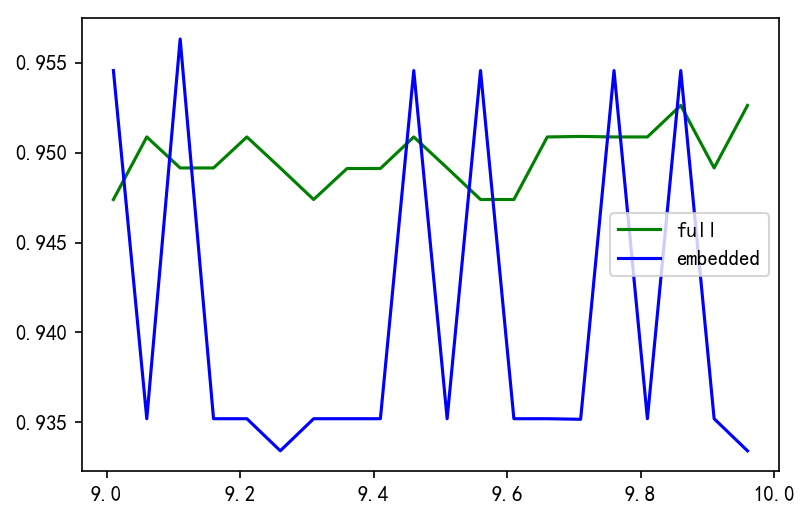

In [68]:
plt.plot(np.arange(9.01, 10.01, 0.05), scores_lr, c='g', label='full')
plt.plot(np.arange(9.01, 10.01, 0.05), scores_embedded, c='b', label='embedded')
plt.xticks()
plt.legend()
plt.show()

In [74]:
lr = LR(solver='liblinear', C=9.15, max_iter=1000)
X_embedded = SelectFromModel(lr, norm_order=1).fit_transform(X, y)

In [76]:
cross_val_score(lr, X_embedded, y, cv=10).mean()

0.9545620516809263

In [78]:
lr.fit(X_embedded, y).coef_

array([[ 1.40114534, -3.08996811, -2.94464718, -0.91303347, -1.93492208,
        -1.142004  , -2.94266703, -3.96002176, -0.41695769]])

## max_iter

D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


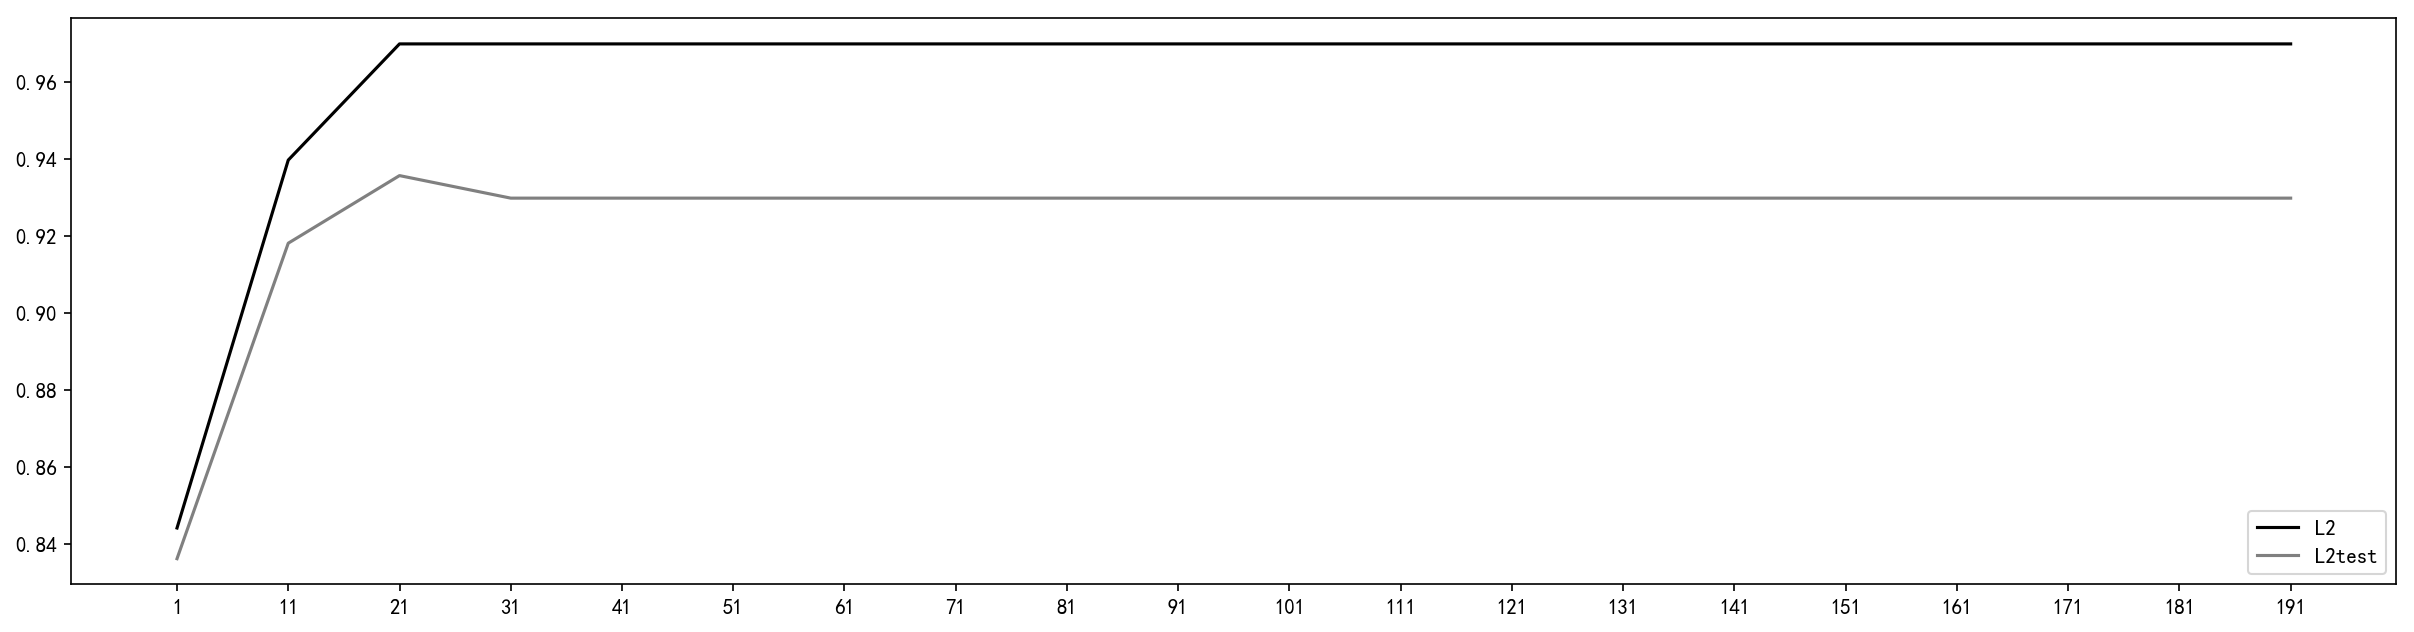

array([25], dtype=int32)

In [82]:
l2 = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
    plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()
#我们可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数
lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

In [38]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
data = load_iris()
X = data.data
y = data.target

for i in ['multinomial', 'ovr']:
    lr = LR(solver='sag', max_iter=2000, random_state=42, multi_class=i).fit(X, y)
    print("training score : %.3f (%s)" % (lr.score(X, y),
i))

training score : 0.980 (multinomial)
training score : 0.953 (ovr)


## 逻辑回归与评分卡

### 加载数据

In [45]:
import pandas as pd
data = pd.read_csv('data/rankingcard.csv', index_col=0)

In [46]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


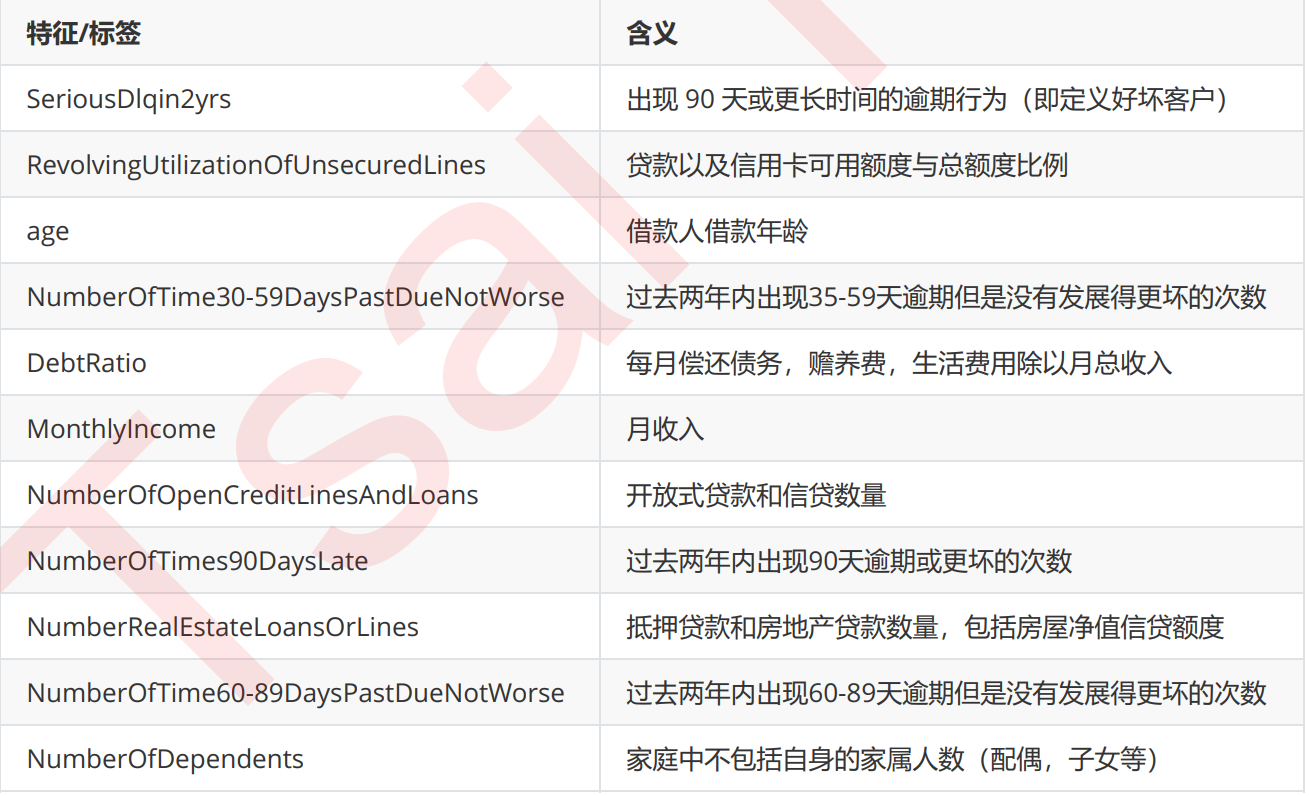


### 查看数据信息

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [48]:
for column in data.columns.values:
    print(column, np.unique(data[column]))

SeriousDlqin2yrs [0 1]
RevolvingUtilizationOfUnsecuredLines [0.0000e+00 8.3700e-06 9.9300e-06 ... 2.2198e+04 2.9110e+04 5.0708e+04]
age [  0  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 101 102 103 105 107 109]
NumberOfTime30-59DaysPastDueNotWorse [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 96 98]
DebtRatio [0.00000e+00 2.60000e-05 3.69000e-05 ... 3.07001e+05 3.26442e+05
 3.29664e+05]
MonthlyIncome [ 0.  1.  2. ... nan nan nan]
NumberOfOpenCreditLinesAndLoans [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 56 57 58]
NumberOfTimes90DaysLate [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 96 98]
N

### 处理异常数据

In [49]:
np.unique(data['SeriousDlqin2yrs'])

array([0, 1], dtype=int64)

In [50]:
"""先处理年龄为0的问题"""
data.loc[data['age'] == 0, 'age']

65696    0
Name: age, dtype: int64

可以看到，只有一个人的年龄为0，一般而言，银行不会给未成年人放贷的，这里出现年龄为0的情况，要么是父母给孩子办理的，要么就是银行出错了。  
对于有15000的数据集来说，我们完全可以删除这一个数据。

In [51]:
data.drop(index=65696, inplace=True)

In [172]:
"""处理违约异常的"""
(data['NumberOfTime60-89DaysPastDueNotWorse'] > 90).sum()

269

In [175]:
data['SeriousDlqin2yrs'][data['NumberOfTime60-89DaysPastDueNotWorse'] > 90].mean()

0.5464684014869888

### 处理缺失值

In [52]:
"""
处理缺失值。
在银行借贷系统中，我们要捕抓的是少数违约的人群，那些月收入没有填写的很有可能是那些不良信用贷款比较高的人群，所以最好不要删除，  
我们这里先查看月收入与违约的比例
"""
no_monthly_target = data.loc[data['MonthlyIncome'].isnull(), 'SeriousDlqin2yrs']
monthly_target = data.loc[data['MonthlyIncome'].notnull(), 'SeriousDlqin2yrs']

In [53]:
no_monthly_target.sum() / no_monthly_target.count()  

0.05613669234132723

In [54]:
monthly_target.sum() / monthly_target.count()  

0.06948648019423288

算出没有填写月收入的贷款违约比例， 可以看到贷款违约比例为5%左右，貌似比填写了月收入的还低了。

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149999 non-null int64
RevolvingUtilizationOfUnsecuredLines    149999 non-null float64
age                                     149999 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149999 non-null int64
DebtRatio                               149999 non-null float64
MonthlyIncome                           120268 non-null float64
NumberOfOpenCreditLinesAndLoans         149999 non-null int64
NumberOfTimes90DaysLate                 149999 non-null int64
NumberRealEstateLoansOrLines            149999 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149999 non-null int64
NumberOfDependents                      146075 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [148]:
def fill_nan(df):
    """
    利用随机森林填补缺失值。(把target也当成是一个特征，而把缺失值的特征当成target)
    如果数据不止一个特征有缺失值的话，那么按缺失值最少的特征先进行填补，
    缺失值的多的特征，先用均值代。
    填补完缺失值少的特征后，再继续用随机森林json补缺失值多的特征。
    
    Parameters:
    ----------
    df: Pd.DataFrame
    
    Returns:
    --------
    df:Pd.DataFrame
    """
    df = df.copy()
    
    from sklearn.impute import SimpleImputer as SI
    from sklearn.ensemble import RandomForestRegressor as RFR
    # 实例化用均值填补缺失值的类
    SI = SI(missing_values=np.nan) 
    
    # 计算每一列缺失值个数
    missing_count_list = df.isnull().sum(axis=0)
    # 按照缺失值个从小到大排序其索引
    sorted_missing_count = np.argsort(missing_count_list)
    # 按照缺失值的个数，由少到多进行填补
    for i in sorted_missing_count:
        # 取出标签，此时还没有分训练集和测试集
        y = df.iloc[:, i]
        # 分训练集和测试集
        null_index = y.isnull()
        if null_index.sum() == 0:
            print('没有数据缺失')
            continue
            
        # 取出特征
        X = df.loc[:, df.columns != df.columns[i]]
        X = SI.fit_transform(X)  # 用中位数暂时填补缺失值

        # 划分训练集和测试集
        X_train = X[y.notnull(), :]
        y_train = y[~null_index]
        X_test = X[null_index , :]
        
        
        # 用随机森林预测缺失值
        rfr = RFR(n_estimators=20, random_state=1).fit(X_train, y_train)
        y_predict = rfr.predict(X_test)
        
        # 填补缺失值
        df.loc[null_index, df.columns[i]] = y_predict
#         print(y_predict.shape)
#         print(df.info())
    return df

鉴于用随机森林填补缺失值效果不是很好，这里采用均值填补月收入，中位数填补NumberOfDependent

In [155]:
from sklearn.impute import SimpleImputer as SI

impute_mean = SI(missing_values=np.nan, strategy='mean')
impute_median = SI(missing_values=np.nan, strategy='median')

In [160]:
monthly_income = impute_mean.fit_transform(data['MonthlyIncome'].values.reshape(-1,1))
number_of_dependents = impute_median.fit_transform(data['NumberOfDependents'].values.reshape(-1,1))

In [161]:
data['MonthlyIncome'] = monthly_income
data['NumberOfDependents'] = number_of_dependents

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149999 non-null int64
RevolvingUtilizationOfUnsecuredLines    149999 non-null float64
age                                     149999 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149999 non-null int64
DebtRatio                               149999 non-null float64
MonthlyIncome                           149999 non-null float64
NumberOfOpenCreditLinesAndLoans         149999 non-null int64
NumberOfTimes90DaysLate                 149999 non-null int64
NumberRealEstateLoansOrLines            149999 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149999 non-null int64
NumberOfDependents                      149999 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [164]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,1.499990e+05,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000
mean,0.066840,6.048472,52.295555,0.421029,353.007426,6.670227e+03,8.452776,0.265975,1.018233,0.240388,0.737405
std,0.249746,249.756203,14.771298,4.192795,2037.825113,1.288049e+04,5.145964,4.169318,1.129772,4.155193,1.107020
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154176,52.000000,0.000000,0.366503,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559044,63.000000,0.000000,0.868257,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## 用pca降维，看看数据的大致分布状态

In [179]:
from sklearn.decomposition import PCA
PCA_2 = PCA(n_components=2).fit(data.iloc[:,1:])  # 把标签外的数据进行降维
two_dim_data = PCA_2.transform(data.iloc[:, 1:])

In [183]:
PCA_2.explained_variance_ratio_.sum()

0.9996315993461974

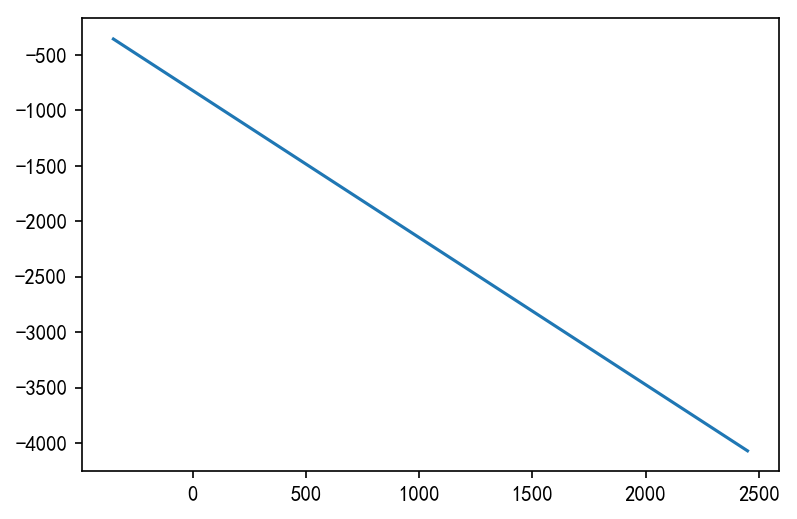

In [185]:
plt.plot(two_dim_data[0], two_dim_data[1])

## 试一试用逻辑回归跑一下

In [189]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score
lr = LR()
cross_val_score(lr, two_dim_data, data.iloc[:, 0], cv=10).mean()

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklea

0.9331595557920871

### 试一试对C画学习曲线

In [200]:
scores_lr = []
for c in np.arange(0.01, 10.01):
    score = cross_val_score(LR(C=c, max_iter=500), two_dim_data, data.iloc[:, 0], cv=5).mean()
    scores_lr.append(score)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklea

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklea

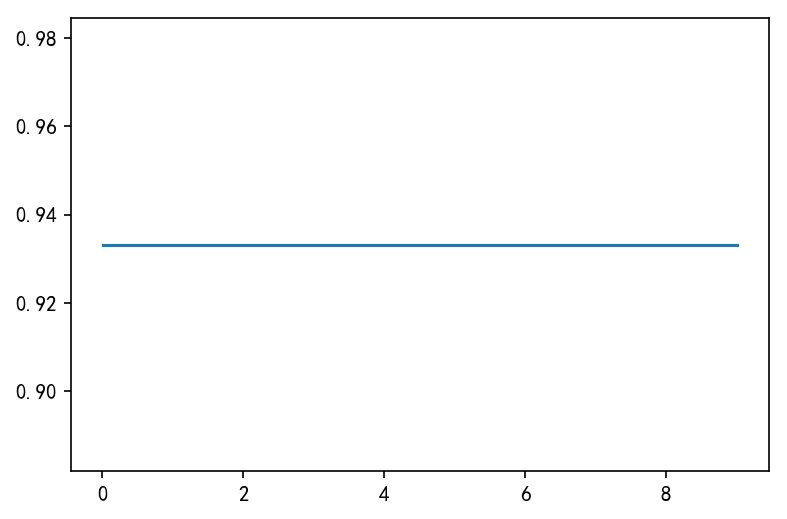

In [201]:
plt.plot(np.arange(0.01, 10.01), scores_lr)

# 逻辑回归制作评分卡

## 导库，并加载数据


In [412]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR

In [413]:
plt.rcParams['figure.dpi'] = 150

In [414]:
data = pd.read_csv('data/rankingcard.csv', index_col=0)

## 探索数据与数据预处理

In [415]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


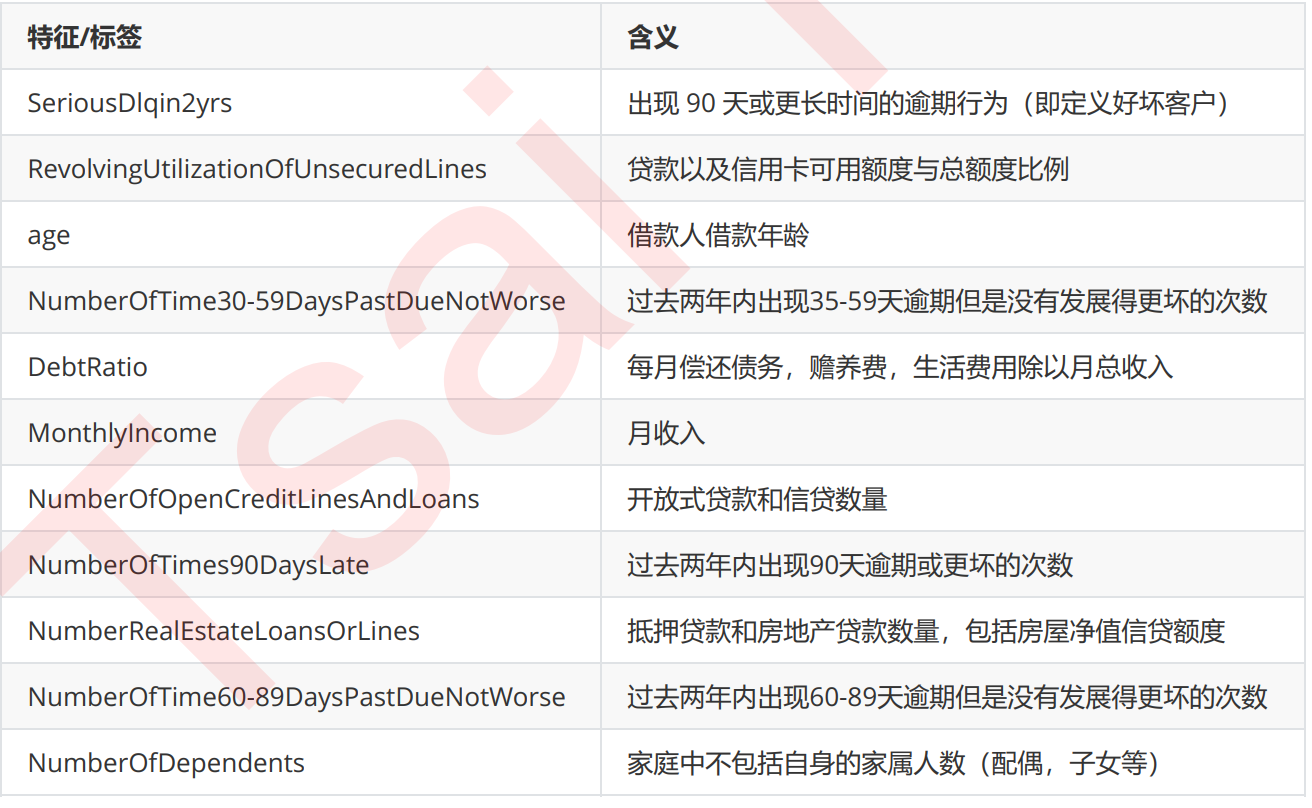

In [416]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [417]:
data.shape

(150000, 11)

In [418]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### 去除重复值

In [419]:
data.drop_duplicates(inplace=True)

In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [421]:
"""恢复索引"""
data.index = range(data.shape[0])

### 填补缺失值

In [422]:
"""查看缺失值的比例"""
data.isnull().sum() / data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

可以看到，“月收入”，“家属人数”都有缺失值。  
一般而言，月收入是衡量一个人信用评分的一个很好的指标，所以我们不能简单粗暴地把月收入为nan值的样本删除，而且缺失值占有差不多20%。  
对于家属人数缺失的，我们可以用均值填补。

In [423]:
"""先填补家属人数缺失的样本"""
data['NumberOfDependents'].fillna(int(data['NumberOfDependents'].mean()), inplace=True)

In [424]:
data.info()

data.isnull().sum() / data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [425]:
"""对于月收入，我们倾向于用随机森林进行填补"""
def fill_missing_rfr(X, y, to_fill):
    """
    用随机森林回归进行填补缺失值, 一次填补一列
    
    Parameters:
    ----------
    X: pd.DataFrame  
        含有缺失值的特征矩阵
    y: array_like  
        标签
    to_fill: str
        要填补缺失值的特征名称
    
    Returns:
    -------
    y_predict: array_like
        填补好的特征列
    """
    df = X.copy()
    y_fill = df.loc[:, to_fill]  # 把需要填补的列，单独取处理
    df = pd.concat([df.loc[:, df.columns!=to_fill], pd.DataFrame(y)], axis=1)  # 将标签当成特征进行数据预测
    
    # 划分训练集和测试集
    X_train = df[y_fill.notnull()]
    y_train = y_fill[y_fill.notnull()]
    
    X_test = df[y_fill.isnull()]
    
    from sklearn.ensemble import RandomForestRegressor as RFR
    rfr = RFR(n_estimators=100).fit(X_train, y_train)
    y_predict = rfr.predict(X_test)
    return y_predict

In [426]:
X = data.iloc[:, 1:]  # 取出特征矩阵
y = data.iloc[:, 0]  # 取出标签
y_predict = fill_missing_rfr(X, y, to_fill='MonthlyIncome')

In [427]:
# 将月收入的缺失值填充进去
data.loc[data['MonthlyIncome'].isnull(), 'MonthlyIncome'] = y_predict

In [428]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           149391 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


### 描述性统计处理异常值

In [43]:
data.describe([0.01, 0.1, 0.25, 0.5, 0.75, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,4985.100000,329664.0
MonthlyIncome,149391.0,5424.899449,13244.418183,0.0,0.0,0.180000,1800.000000,4417.000000,7416.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


我们可以看到，异常数据有：  
1. 年龄最小为0。
2. 90天内逾期但没发展到糟糕情况的最大值为98，这很奇怪，一般而言这个值最大也就90，而这里有大于90的，说明数据存在异常

In [44]:
"""先处理年龄未到法定年龄的"""
(data['age'] <= 8).sum()

1

In [429]:
"""可以看到异常值只有一个，所以我们可以直接删除"""
data = data[data['age'] > 8]

In [46]:
"""处理90天内逾期的"""
(data['NumberOfTime60-89DaysPastDueNotWorse']>90).sum()

225

In [47]:
# 查看逾期超过90天的，坏账情况
(data['SeriousDlqin2yrs'][data['NumberOfTime60-89DaysPastDueNotWorse'] > 90]).value_counts()


1    136
0     89
Name: SeriousDlqin2yrs, dtype: int64

In [430]:
"""可以看到逾期90天以上的客户并非全是坏客户，所以这里可以直接删除异常数据"""
data = data[data['NumberOfTime60-89DaysPastDueNotWorse']<= 90]

In [431]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149165.000000,149165.000000,149165.000000,149165.000000,149165.000000,1.491650e+05,149165.000000,149165.000000,149165.000000,149165.000000,149165.000000
mean,0.066188,6.078770,52.331076,0.246720,354.963542,5.428978e+03,8.493688,0.090725,1.023927,0.065069,0.740911
std,0.248612,250.453111,14.714114,0.698935,2043.344496,1.323148e+04,5.129841,0.486354,1.130350,0.330675,1.108534
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030033,41.000000,0.000000,0.178211,1.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153615,52.000000,0.000000,0.368619,4.433000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.553698,63.000000,0.000000,0.876994,7.417000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,13.000000,329664.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


### 样本不均衡问题

In [432]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

y.value_counts()
print('违约占比：{:.2%} ，守信占比：{:.2%}'.format(y.value_counts()[1] / y.shape[0], 
                                           y.value_counts()[0] / y.shape[0]))

违约占比：6.62% ，守信占比：93.38%


In [433]:
from imblearn.over_sampling import SMOTE

In [434]:
"""通过上采样，解决样本不均衡问题"""
sm = SMOTE(random_state=42)
X, y = sm.fit_sample(X, y)

n_samples = y.shape[0]

value_counts = pd.Series(y).value_counts()
print(value_counts)

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64


### 划分训练集和测试集，然后保存数据


In [435]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

In [436]:
model_data = pd.concat([y_train, X_train], axis=1)
model_data.columns = data.columns
model_data.index = range(model_data.shape[0])

vali_data = pd.concat([y_test, X_test], axis=1)
vali_data.columns = data.columns
vali_data.index = range(vali_data.shape[0])

In [82]:
# 保存数据
model_data.to_csv('data/model_data.csv')
vali_data.to_csv('data/vali_data.csv')

## 分箱

>分箱是把连续型数据离散化。分箱的个数越多，信息损失得越多，一般控制在10个箱子一下。

对于评分卡来说，我们分5个箱子就足够了。为了衡量特征的信息量，银行业已经有了相应的函数，information value(IV)。
$$IV = \displaystyle \sum_{i = 1}^{N}(good\% - bad\%)\times WOE_i$$

$$WOE_i = ln(\dfrac{good\%}{bad\%})$$

在IV中，good%和bad%为**所有**优质客户、坏客户占总的客户百分比。而在$WOE_i$中，good%、bad%则是**对应箱子中**优质客户、坏客户占箱子样本数的百分比。

WOE又称证据权重(weight of evidence)，WOE越大说明箱子优质客户越多。

IV表示的意义是特征的信息量以及这个特征对模型的共享。
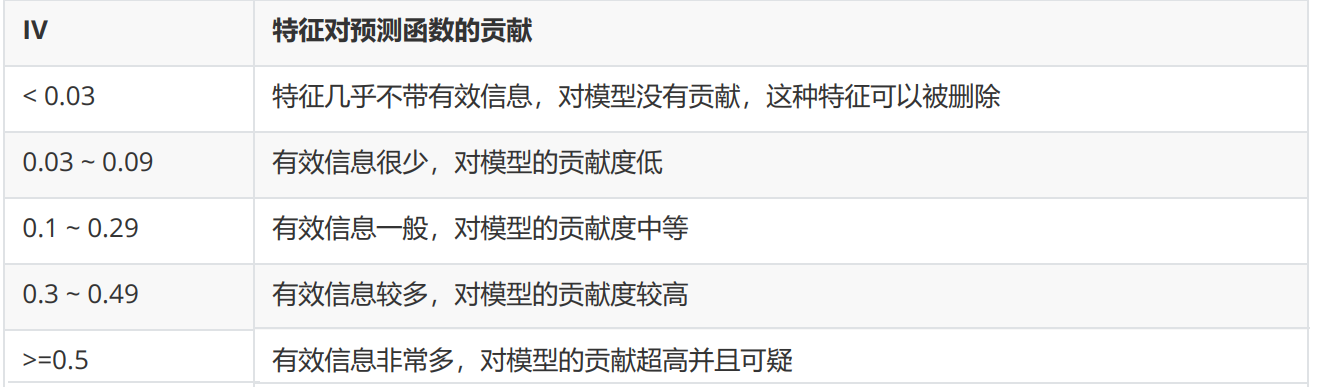

IV并非越大越好，当分箱的个数越来越多的时候，信息损失就越大，这是IV越小，所以可以通过观察IV值来确定分箱个数。

### 等频分箱

In [437]:
"""pd.qcut 返回两个结果：一个是数据集的对应每个数据的所在的区间，
一个是所有的区间(如果retbins=True时，返回的则是区间的边界)"""
model_data['qcut'], updown = pd.qcut(model_data['age'], q=20, retbins=True, duplicates='drop')

In [438]:
# 计算每个箱子中标签为0和标签为1的个数
count_y0 = model_data[model_data['SeriousDlqin2yrs'] == 0].groupby('qcut').count()['SeriousDlqin2yrs']
count_y1 = model_data[model_data['SeriousDlqin2yrs'] == 1].groupby('qcut').count()['SeriousDlqin2yrs']

num_bins = [*zip(updown, updown[1:], count_y0, count_y1)]

In [202]:
num_bins

[(21.0, 28.0, 4243, 7560),
 (28.0, 31.0, 3571, 5961),
 (31.0, 34.0, 4075, 6737),
 (34.0, 36.0, 2908, 4604),
 (36.0, 39.0, 5182, 7452),
 (39.0, 41.0, 3956, 5851),
 (41.0, 43.0, 4002, 5725),
 (43.0, 45.0, 4389, 5963),
 (45.0, 46.0, 2419, 3259),
 (46.0, 48.0, 4813, 6184),
 (48.0, 50.0, 4900, 6207),
 (50.0, 52.0, 4728, 5802),
 (52.0, 54.0, 4681, 5022),
 (54.0, 56.0, 4677, 4010),
 (56.0, 58.0, 4483, 3397),
 (58.0, 61.0, 6583, 4813),
 (61.0, 64.0, 6968, 3208),
 (64.0, 68.0, 6623, 2277),
 (68.0, 74.0, 6753, 1886),
 (74.0, 107.0, 7737, 1399)]

### 确保每个箱子中都有正负标签
>我们希望不同属性的人有不同的分数，因此我们希望在同一个箱子内的人的属性是尽量相似的，而不同箱子的人的
属性是尽量不同的，即业界常说的”组间差异大，组内差异小“。对于评分卡来说，就是说我们希望一个箱子内的人
违约概率是类似的，而不同箱子的人的违约概率差距很大，即WOE差距要大，并且每个箱子中坏客户所占的比重（
）也要不同。那我们，可以使用卡方检验来对比两个箱子之间的相似性，如果两个箱子之间卡方检验的P值很
大，则说明他们非常相似，那我们就可以将这两个箱子合并为一个箱子。  


基于这样的思想，我们总结出我们对一个特征进行分箱的步骤：
1. 我们首先把连续型变量分成一组数量较多的分类型变量，比如，将几万个样本分成100组，或50组
2. 确保每一组中都要包含两种类别的样本，否则IV值会无法计算
3. 我们对相邻的组进行卡方检验，卡方检验的P值很大的组进行合并，直到数据中的组数小于设定的N箱为止
4. 我们让一个特征分别分成[2,3,4.....20]箱，观察每个分箱个数下的IV值如何变化，找出最适合的分箱个数
5. 分箱完毕后，我们计算每个箱的WOE值， ，观察分箱效果  
这些步骤都完成后，我们可以对各个特征都进行分箱，然后观察每个特征的IV值，以此来挑选特征。
接下来，我们就以"age"为例子，来看看分箱如何完成

In [188]:
for i in range(20):
    # 判断第一组是否有正负标签，如果没有的话向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(         
            num_bins[0][0],  # 区间下限为第一组的下限
            num_bins[1][1],  # 区间上限换成第二组的区间上限
            num_bins[0][2] + num_bins[1][2],  # 将第一二组标签为0的样本数量合并
            num_bins[0][3] + num_bins[1][3]   # 将第一二组标签为1的样本数量合并
        )]
        continue
        
    # 判断第二组是否都有标签为0和1的样本，如果没有的话，向前合并，因为我们已经确保第一组含有标签为0和1
    for j in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[j-1: j+1] = [(
                num_bins[j-1][0],  
                num_bins[j][1],
                num_bins[j-1][2] + num_bins[j][2],
                num_bins[j-1][3] + num_bins[j][3],
            )]
            break  # 跳出当前循环的原因是num_bins的len已经发生变换，但循环的j还没有即使更新
    else:
        break  # 如果第一组和后面的组都含有标签为0，1的样本则跳出循环

In [189]:
num_bins

[(21.0, 28.0, 4243, 7560),
 (28.0, 31.0, 3571, 5961),
 (31.0, 34.0, 4075, 6737),
 (34.0, 36.0, 2908, 4604),
 (36.0, 39.0, 5182, 7452),
 (39.0, 41.0, 3956, 5851),
 (41.0, 43.0, 4002, 5725),
 (43.0, 45.0, 4389, 5963),
 (45.0, 46.0, 2419, 3259),
 (46.0, 48.0, 4813, 6184),
 (48.0, 50.0, 4900, 6207),
 (50.0, 52.0, 4728, 5802),
 (52.0, 54.0, 4681, 5022),
 (54.0, 56.0, 4677, 4010),
 (56.0, 58.0, 4483, 3397),
 (58.0, 61.0, 6583, 4813),
 (61.0, 64.0, 6968, 3208),
 (64.0, 68.0, 6623, 2277),
 (68.0, 74.0, 6753, 1886),
 (74.0, 107.0, 7737, 1399)]

### 定义WOE和IV函数

In [225]:
def get_woe(num_bins):
    """
    通过num_bins构造woe函数
    
    Parameters:
    ----------
    num_bins: list
        [区间下限, 区间下限, 标签为0的个数, 标签为1的个数]
    
    Returns:
    --------
    df: pd.DataFrame
        放回一个含有各类信息的woe DataFrame
        df.columns = ['min', 'max', 'count_y0', 'count_y1',
                    'total', 'percentage', 'bad_rate', 
                    'good%', 'bad%', 'woe']
        其中，total : 箱子中样本的个数
              percentage : 箱子中样本个数占总个数的百分比
              bad_rate : 箱子中坏样本所占的比例
              good% : 好样本占所有好样本的比例
              bad% : 坏样本占所有坏样本的比例
              woe : woe值
    """
    columns = ['min', 'max', 'count_y0', 'count_y1']
    df = pd.DataFrame(num_bins, columns=columns)
    df['total'] = df['count_y0'] + df['count_y1']
    df['percentage'] = df['total'] / df['total'].sum()
    df['bad_rate'] = df['count_y1'] / df['total']
    df['good%'] = df['count_y0'] / df['count_y0'].sum()
    df['bad%'] = df['count_y1'] / df['count_y1'].sum()
    df['woe'] = np.log(df['good%'] / df['bad%'])
    return df

In [227]:
def get_iv(df):
    """
    计算IV值。
    
    Parameters
    ----------
    df : pd.DataFrame
        带有woe的df
        
    Returns
    -------
    iv : float
        
    """
    rate = df['good%'] - df['bad%']
    iv = np.dot(rate, df['woe'])
    return iv

### 卡方检验，合并箱子，画出IV曲线 

In [190]:
num_bins_ = num_bins.copy()

In [191]:
import matplotlib.pyplot as plt 
import scipy

In [192]:
def merge(num_bins):
    """
    利用卡方检验合并箱子
    
    Parameters:
    -----------
    num_bins:list 
        [区间下限, 区间下限, 标签为0的个数, 标签为1的个数]
    
    Returns:
    -------
    axis: list
        含有箱子数量的列表，用于绘图当x轴
    iv_list: list
        IV值
    """
    axis = []
    iv_list = []
    while len(num_bins) > 2:
        for i in range(len(num_bins) -1):
            pvs = []  # 用于接收卡方检验返回的P值
            p = scipy.stats.chi2_contingency([num_bins[i][2:], num_bins[i+1][2:]])[1]
            pvs.append(p)
        
        max_index = pvs.index(max(pvs))
        num_bins[max_index: max_index+2] = [(
                        num_bins[max_index][0],
                        num_bins[max_index+1][1],
                        num_bins[max_index][2] + num_bins[max_index+1][2],
                        num_bins[max_index][3] + num_bins[max_index+1][3],
        )]
        
        axis.append(len(num_bins))
        woe = get_woe(num_bins)
        iv = get_iv(woe)
        iv_list.append(iv)
        
    return axis, iv_list

In [193]:
axisx, IV = merge(num_bins_)


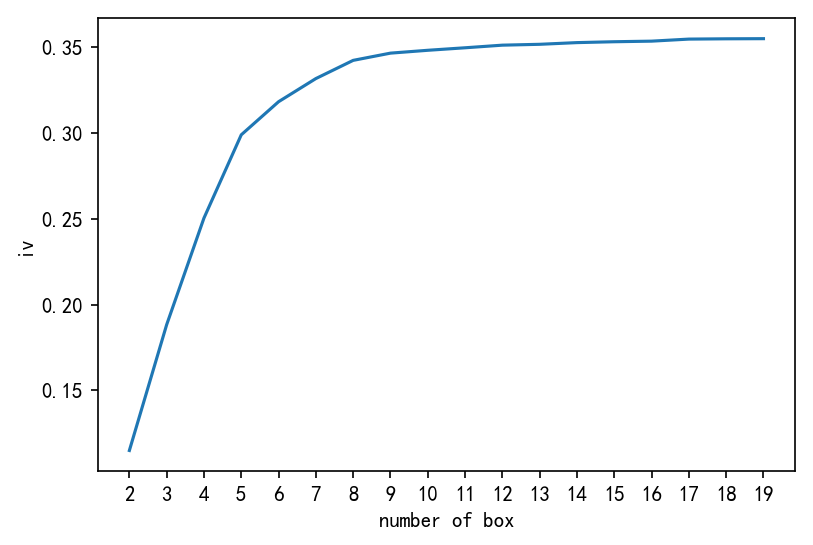

In [195]:
fig = plt.figure()
plt.plot(axisx, IV)
plt.xticks(axisx)
plt.xlabel('number of box')
plt.ylabel('iv')
plt.show()

### 用最佳分箱个数，验证分箱结果

In [204]:
def get_bin(num_bins, n):
    """
    利用卡方检验合并箱子
    
    Parameters:
    -----------
    num_bins:list 
        [区间下限, 区间下限, 标签为0的个数, 标签为1的个数]
    n : int
        最佳分箱个数
    
    Returns:
    -------
    num_bins : list
        合并后的num_bins
        
    """
    num_bins = num_bins.copy()
    while len(num_bins) > n:
        for i in range(len(num_bins) -1):
            pvs = []  # 用于接收卡方检验返回的P值
            p = scipy.stats.chi2_contingency([num_bins[i][2:], num_bins[i+1][2:]])[1]
            pvs.append(p)
        
        max_index = pvs.index(max(pvs))
        num_bins[max_index: max_index+2] = [(
                        num_bins[max_index][0],
                        num_bins[max_index+1][1],
                        num_bins[max_index][2] + num_bins[max_index+1][2],
                        num_bins[max_index][3] + num_bins[max_index+1][3],
        )]
    return num_bins

In [228]:
after_bins = get_bin(num_bins, n=4)

In [229]:
after_bins

[(21.0, 64.0, 76578, 91755),
 (64.0, 68.0, 6623, 2277),
 (68.0, 74.0, 6753, 1886),
 (74.0, 107.0, 7737, 1399)]

In [230]:
get_woe(after_bins)

,min,max,count_y0,count_y1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,64.0,76578,91755,168333,0.863211,0.545080,0.783880,0.942847,-0.184648
1,64.0,68.0,6623,2277,8900,0.045639,0.255843,0.067795,0.023398,1.063854
2,68.0,74.0,6753,1886,8639,0.044301,0.218312,0.069126,0.019380,1.271693
3,74.0,107.0,7737,1399,9136,0.046849,0.153130,0.079199,0.014376,1.706421


### 将选取最佳分箱个数的过程包装为类

In [305]:
def graphforbestbin(df, X, y, n=5, q=20, graph=False):
    """
    实现最优分箱，基于卡方检验

    Parameters
    ----------
    df : pd.DataFrame
        输入的数据
    X : 要分箱的列名
    y : 标签名
    n : 保留分箱的个数
    q : 初始分箱个数
    """
    df = df[[X, y]].copy()
    
    # make num_bins
    df['qcut'], updown = pd.qcut(df[X], q=q, retbins=True, duplicates='drop')
    count_y0 = df[df[y] == 0].groupby('qcut').count()[y]
    count_y1 = df[df[y] == 1].groupby('qcut').count()[y]
    num_bins = [*zip(updown, updown[1:], count_y0, count_y1)]
    
    # 检验num_bins
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0: 2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2] + num_bins[1][2],
                num_bins[0][3] + num_bins[1][3],
            )]
            continue
        
        for j in range(len(num_bins)):
            if 0 in num_bins[j][2:]:
                num_bins[j-1 : j+1] = [(
                    num_bins[j-1][0],
                    num_bins[j][1],
                    num_bins[j-1][2] + num_bins[j][2],
                    num_bins[j-1][3] + num_bins[j][3],
                )]
                break
                
        else:
            break
            
    def _get_woe(num_bins):
        """
        通过num_bins构造woe函数

        Parameters:
        ----------
        num_bins: list
            [区间下限, 区间下限, 标签为0的个数, 标签为1的个数]

        Returns:
        --------
        df: pd.DataFrame
            放回一个含有各类信息的woe DataFrame
            df.columns = ['min', 'max', 'count_y0', 'count_y1',
                        'total', 'percentage', 'bad_rate', 
                        'good%', 'bad%', 'woe']
            其中，total : 箱子中样本的个数
                  percentage : 箱子中样本个数占总个数的百分比
                  bad_rate : 箱子中坏样本所占的比例
                  good% : 好样本占所有好样本的比例
                  bad% : 坏样本占所有坏样本的比例
                  woe : woe值
        """
        columns = ['min', 'max', 'count_y0', 'count_y1']
        df = pd.DataFrame(num_bins, columns=columns)
        df['total'] = df['count_y0'] + df['count_y1']
        df['percentage'] = df['total'] / df['total'].sum()
        df['bad_rate'] = df['count_y1'] / df['total']
        df['good%'] = df['count_y0'] / df['count_y0'].sum()
        df['bad%'] = df['count_y1'] / df['count_y1'].sum()
        df['woe'] = np.log(df['good%'] / df['bad%'])
        return df

    def _get_iv(df):
        """
        计算IV值。

        Parameters
        ----------
        df : pd.DataFrame
            带有woe的df

        Returns
        -------
        iv : float

        """
        rate = df['good%'] - df['bad%']
        iv = np.dot(rate, df['woe'])
        return iv
    
    IV = []
    axisx = []
    while len(num_bins) > n:
        
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
            
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]
        bins_df = pd.DataFrame(_get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(_get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

### 多所有的特征进行选择

RevolvingUtilizationOfUnsecuredLines


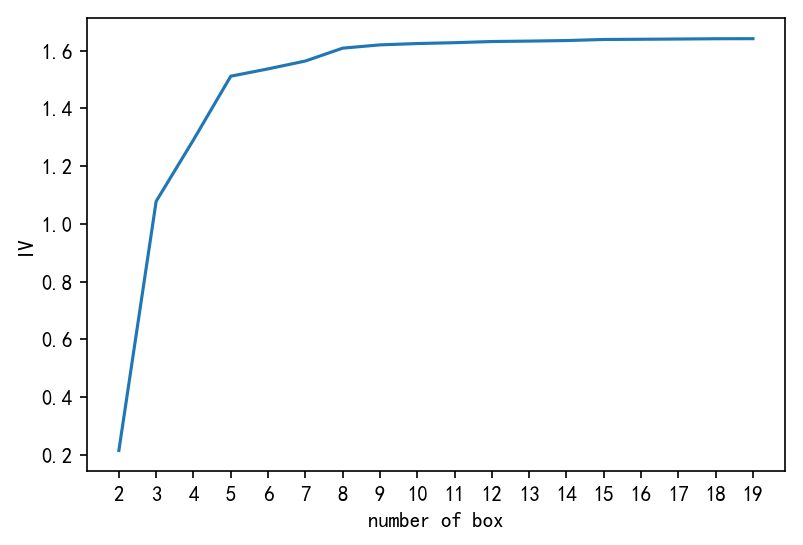

age


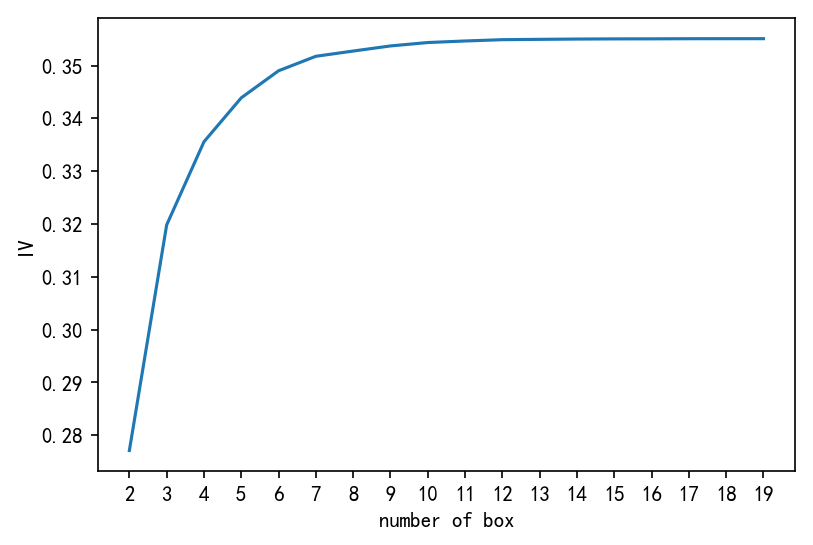

NumberOfTime30-59DaysPastDueNotWorse


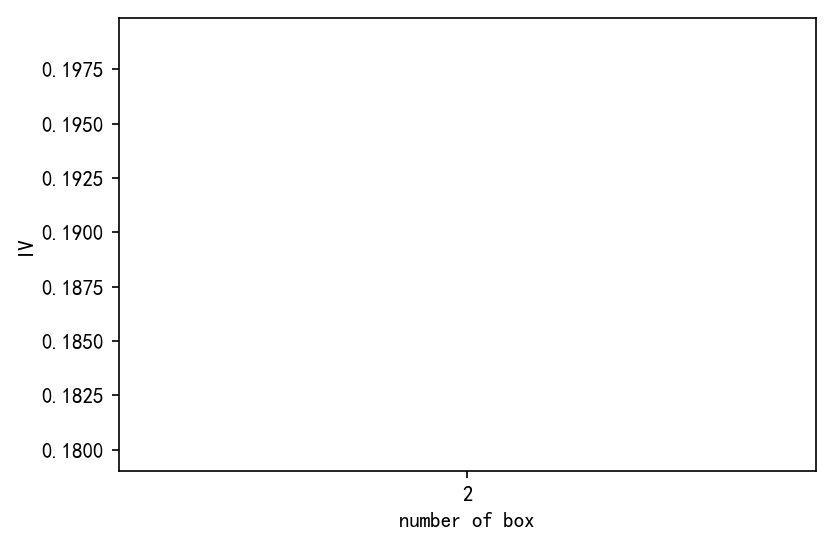

DebtRatio


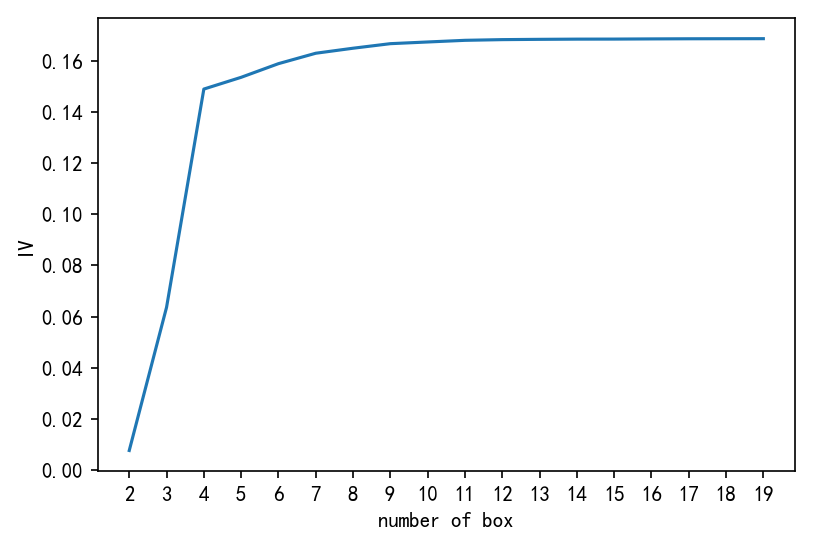

MonthlyIncome


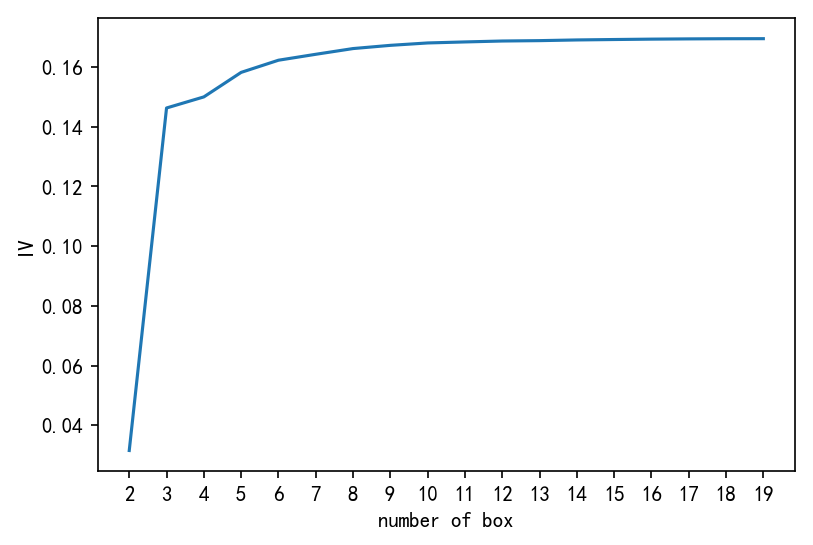

NumberOfOpenCreditLinesAndLoans


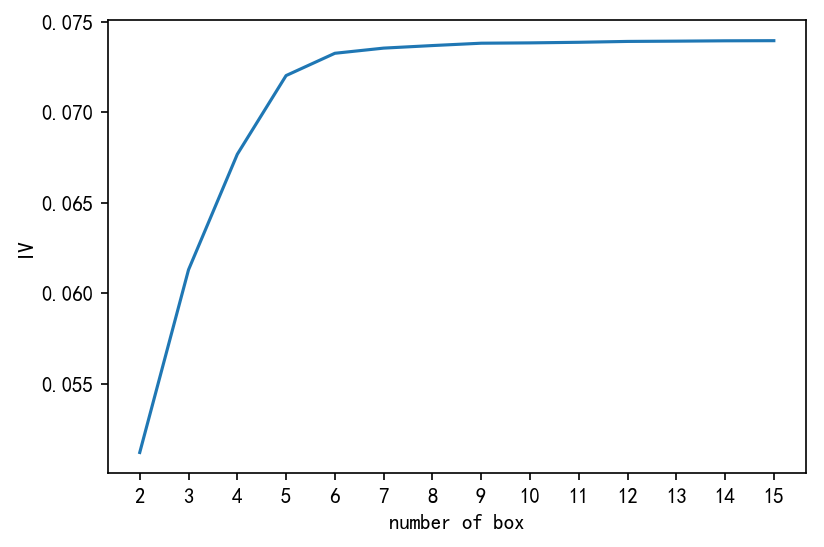

NumberOfTimes90DaysLate


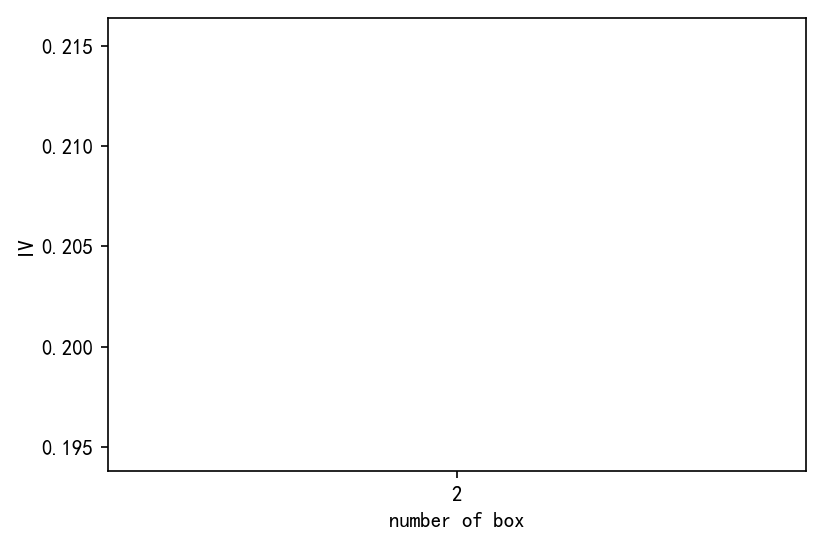

NumberRealEstateLoansOrLines


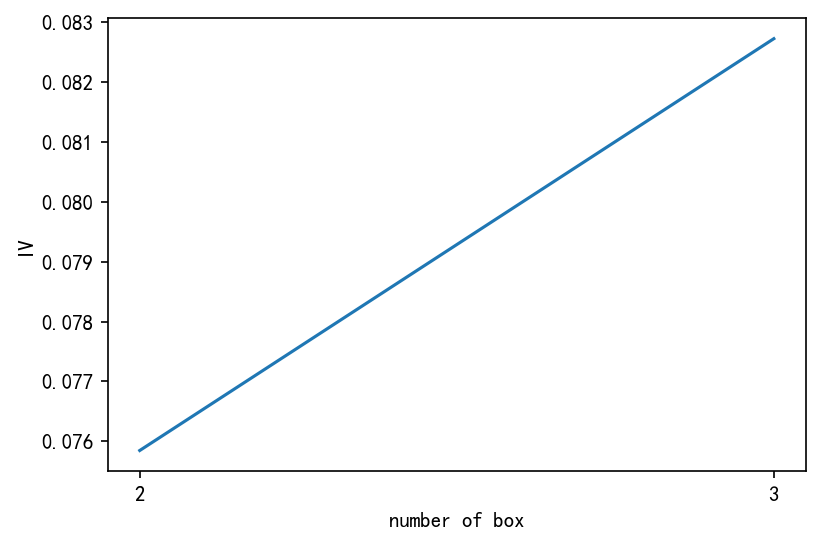

NumberOfTime60-89DaysPastDueNotWorse


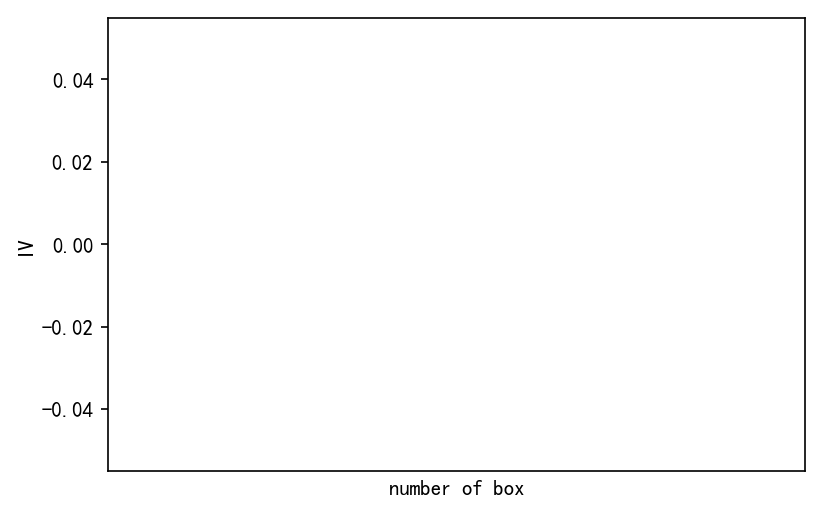

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [308]:
model_data.columns
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20, graph=True)

可以看到并非所有的特征可以进行分箱的，有一些特征根本不符合分箱的要求。

In [ ]:
tmp = graphforbestbin(model_data, 'age', 'SeriousDlqin2yrs', n=2, q=20)

In [319]:
tmp

,min,max,count_y0,count_y1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,61.0,69610,88547,158157,0.811028,0.559868,0.712553,0.909882,-0.244461
1,61.0,107.0,28081,8770,36851,0.188972,0.237985,0.287447,0.090118,1.159921


In [318]:
set(tmp['min']).union(tmp['max'])

{21.0, 61.0, 107.0}

In [309]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
        "age":5,
        "DebtRatio":4,
        "MonthlyIncome":3,
        "NumberOfOpenCreditLinesAndLoans":5}
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
        ,"NumberOfTimes90DaysLate":[0,1,2,17]
        ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
        ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
        ,"NumberOfDependents":[0,1,2,3]}
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [311]:
hand_bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

接下来对所有特征按照选择的箱体个数和手写的分箱范围进行分箱：

In [321]:
bins_of_col = {}
for col in auto_col_bins:
    bins_df = graphforbestbin(
        model_data, 
        col,
        'SeriousDlqin2yrs',
        n=auto_col_bins[col],
        q=20,
        graph=False
                        )
    bins_list = sorted(set(bins_df['min']).union(bins_df['max']))  # 合并区间，这里用集合是因为最小值区间上限=最大值区间下限
    bins_list[0], bins_list[-1] = -np.inf, np.inf
    bins_of_col[col] = bins_list

In [332]:
bins_of_col.update(hand_bins)

In [333]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09896531250000001,
  0.29805387844466347,
  0.46520709114394176,
  0.9824034417564677,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.017500875550000003,
  0.40166383662187843,
  1.4742210817767465,
  inf],
 'MonthlyIncome': [-inf, 0.10055111559029495, 6166.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

## 计算各箱的WOE值，并映射到数据中

In [334]:
data = model_data.copy()
#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()
data["cut"] = pd.cut(data["age"],[-np.inf, 48.49986200790144, 58.757170160044694, 64.0,
74.0, np.inf])
data

,age,SeriousDlqin2yrs,cut
0,53,0,"(48.5, 58.757]"
1,63,0,"(58.757, 64.0]"
2,39,1,"(-inf, 48.5]"
3,73,0,"(64.0, 74.0]"
4,53,1,"(48.5, 58.757]"
5,42,0,"(-inf, 48.5]"
6,37,1,"(-inf, 48.5]"
7,26,0,"(-inf, 48.5]"
8,28,1,"(-inf, 48.5]"
9,32,0,"(-inf, 48.5]"


In [335]:
#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 48.5]",39558,59296
"(48.5, 58.757]",23469,24438
"(58.757, 64.0]",13551,8021
"(64.0, 74.0]",13376,4163
"(74.0, inf]",7737,1399


In [336]:
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

In [337]:
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 48.5]",39558,59296,-0.408610
"(48.5, 58.757]",23469,24438,-0.044295
"(58.757, 64.0]",13551,8021,0.520561
"(64.0, 74.0]",13376,4163,1.163390
"(74.0, inf]",7737,1399,1.706421


将上述过程包装成函数


In [398]:
def get_woe(df, col, y_col, bins):
    """
    获取某一特征分箱后的woe值

    Parameters
    ----------
    df : pd.DataFrame
        原始数据集
    col : str
        进行分箱的特征的列名
    y_col : str
        标签名
    bins : 分箱依据

    Returns
    -------

    """
    data = df[[col, y_col]].copy()
    data['cut'] = pd.cut(data[col], bins)
    bins_df = data.groupby('cut')[y_col].value_counts().unstack()
    woe = bins_df['woe'] = np.log(
        (bins_df[0] / bins_df[0].sum()) / (bins_df[1] / bins_df[1].sum())
    )
    return woe

In [404]:
# 将所有特征的woe值映射到字典中
woe_all = dict()

for col in bins_of_col:
    woe_all[col] = get_woe(model_data, col, 'SeriousDlqin2yrs', bins_of_col[col])

In [405]:
woe_all

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.198001
 (0.099, 0.298]    0.672793
 (0.298, 0.465]   -0.128400
 (0.465, 0.982]   -1.074203
 (0.982, 1.0]     -0.477724
 (1.0, inf]       -2.034521
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.522752
 (36.0, 54.0]   -0.279383
 (54.0, 61.0]    0.249486
 (61.0, 74.0]    1.011397
 (74.0, inf]     1.706421
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0175]     1.523095
 (0.0175, 0.402]    0.035575
 (0.402, 1.474]    -0.388036
 (1.474, inf]       0.174886
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.101]      1.472165
 (0.101, 6166.0]   -0.222063
 (6166.0, inf]      0.272875
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.844417
 (1.0, 3.0]    -0.331191
 (3.0, 5.0]    -0.057269
 (5.0, 17.0]    0.123964
 (17.0, inf]    0.473404
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.353726
 (0.0, 1.0]    -0.874436
 (1.0, 2.0]    -1.380844
 (2.0, inf]    -1.541019
 dtype: floa

将woe映射到原始数据集中

In [440]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)

for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col], bins_of_col[col]).map(woe_all[col])

In [442]:
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
#这就是我们的建模数据了
model_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2.198001,-0.279383,0.035575,-0.222063,-0.057269,0.353726,0.234408,-0.393594,0.125295,0.628335,0
1,0.672793,1.011397,0.035575,-0.222063,-0.057269,0.353726,0.234408,-0.393594,0.125295,0.628335,0
2,-2.034521,-0.279383,-0.388036,-0.222063,-0.057269,-0.874436,-1.741944,-0.393594,-1.774595,-0.478678,1
3,2.198001,1.011397,-0.388036,-0.222063,0.123964,0.353726,0.234408,0.618129,0.125295,0.628335,0
4,-1.074203,-0.279383,-0.388036,0.272875,0.123964,0.353726,0.234408,0.618129,0.125295,-0.582955,1


##  建模于验证


In [448]:
vail_data = pd.read_csv('data/vali_data.csv', index_col=0)

In [449]:
vail_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.000000,58,0,0.000481,2080.000000,4,0,0,0,0.000000
1,1,0.478906,39,0,0.181301,29373.217358,11,0,2,0,3.000000
2,0,0.057460,64,0,0.021830,6000.000000,4,0,0,0,0.000000
3,0,0.011585,52,0,0.139685,5583.000000,8,0,1,0,0.000000
4,1,0.663034,53,0,0.399663,4800.000000,12,0,0,0,0.201706


In [458]:
vail_woe = pd.DataFrame(index=vail_data.index)
for col in bins_of_col:
    vail_woe[col] = pd.cut(vail_data[col], bins_of_col[col]).map(woe_all[col])

vail_woe['SeriousDlqin2yrs'] = vail_data['SeriousDlqin2yrs']

In [459]:
vail_woe.describe()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,83576.000000,83576.000000,83576.000000,83576.000000,83576.000000,83576.000000,83576.000000,83576.000000,83576.000000,83576.000000,83576.000000
mean,-0.007560,0.024371,0.011545,0.010301,-0.003525,-0.028983,-0.063987,-0.000609,-0.017227,0.009595,0.502237
std,1.484381,0.616758,0.408296,0.402196,0.274125,0.651366,0.761119,0.391107,0.457618,0.585176,0.499998
min,-2.034521,-0.522752,-0.388036,-0.222063,-0.844417,-1.541019,-2.428133,-0.393594,-1.818446,-0.582955,0.000000
25%,-1.074203,-0.279383,-0.388036,-0.222063,-0.057269,-0.874436,0.234408,-0.393594,0.125295,-0.526937,0.000000
50%,-0.477724,-0.279383,0.035575,-0.222063,0.123964,0.353726,0.234408,0.194687,0.125295,-0.478678,1.000000
75%,0.672793,0.249486,0.035575,0.272875,0.123964,0.353726,0.234408,0.194687,0.125295,0.628335,1.000000
max,2.198001,1.706421,1.523095,1.472165,0.473404,0.353726,0.234408,0.618129,0.125295,0.628335,1.000000


In [463]:
# 划分训练集和测试集
X_train = model_woe.iloc[:,:-1]
y_train = model_woe.iloc[:,-1]

X_vail = vail_woe.iloc[:,:-1]
y_vail = vail_woe.iloc[:,-1]



开始建模

In [471]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(solver='liblinear' ,max_iter=500).fit(X, y.values.ravel())
lr.score(X_vail, y_vail.values.ravel())

0.40187374365846656

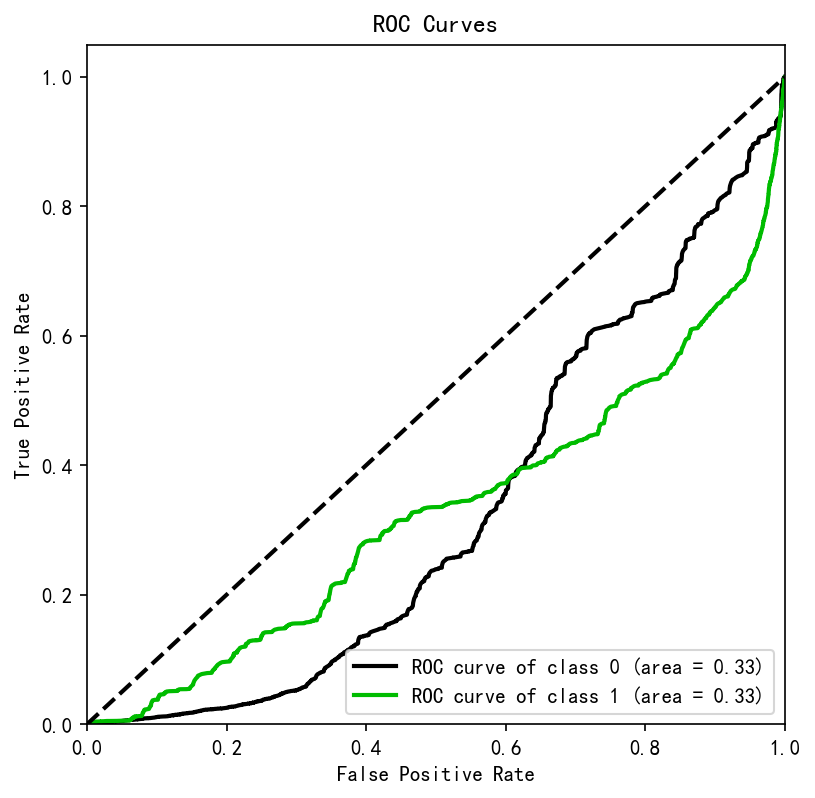

In [474]:
import scikitplot as skplt
#%%cmd
#pip install scikit-plot
vali_proba_df = pd.DataFrame(lr.predict_proba(X_vail))
skplt.metrics.plot_roc(y_vail, vali_proba_df,
        plot_micro=False,figsize=(6,6),
        plot_macro=False)